Check shape of loan data: (39717, 111)
Check for duplicate rows in dataset based on id column: [0]
Number of empty Rows: 0
Number of empty Columns: 54
Lets find Which columns have all null values
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64
Data shape after dropping columns: (39717, 45)
Formated emp_length column to have only numbers
Before cleaning: 697
After cleaning: 0
Removed less than, greater than, plus symbol from emp_length column, percentile symbol from int_rate,revol_util


Start EDA
EDA:

Loan status in total loans issued
Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype

<AxesSubplot:xlabel='loan_amnt'>

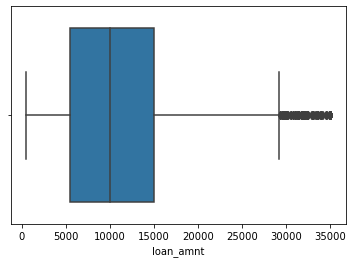

In [147]:
# You work for a consumer finance company which specialises in lending various types of loans to urban customers. 
# When the company receives a loan application, the company has to make a decision for loan approval based on the 
# applicant’s profile. Two types of risks are associated with the bank’s decision:
# If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
# If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to 
# a financial loss for the company

# The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. 
# The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking 
# actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Regular expressions for string manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

# Read CSV file and check it's attributes before proceeding further.
# Reading CSV file with dtype object. I will draw correlation among few variables not all so when it needs i will just convert 
# those as per my need for better visibility. So many variables in correlation creates confusion when they don't add much value.

loan = pd.read_csv('https://raw.githubusercontent.com/leenagiri98/LendingClubCaseStudy/master/loan.csv',dtype=object)

# check shape & datatype of loan data
print("Check shape of loan data:",loan.shape)

#Data Cleaning Starts
# Check for duplicate rows in dataset based on id column
dup= [loan.duplicated(['id']).sum()]
print("Check for duplicate rows in dataset based on id column:",dup)
# There are no duplicate rows in loan dataset

# sum it up to check how many rows have all missing values
print('Number of empty Rows:',loan.isnull().all(axis=1).sum())
#print(loan.isnull().all(axis=1).sum())
# Observation: There are no empty rows in whole dataset.

# sum it up to check how many columns have all missing values
print('Number of empty Columns:',loan.isnull().all(axis=0).sum())
#print(loan.isnull().all(axis=0).sum())
# Observation: There are 54 columns have all missing values.

# Data cleaning
# Lets find Which columns have all null values
print("Lets find Which columns have all null values")

print(loan.isnull().sum())

# Data cleaning
# Lets Drop columns where all values are null. Below in sequence all columns have null values

loan.drop(loan.iloc[:, 53:105], inplace = True, axis = 1) 

# Drop additional columns we don't need these as these are mostly nulls.
columns_drop_list1 = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
loan.drop(labels = columns_drop_list1, axis =1, inplace=True)
columns_drop_list2 = ["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
loan.drop(labels = columns_drop_list2, axis =1, inplace=True)
columns_drop_list3 = ["member_id","url","emp_title","zip_code","tax_liens"]
loan.drop(labels = columns_drop_list3, axis =1, inplace=True)

# Data cleaning
# Lets take a look on data shape after dropping columns which had nothing 
print("Data shape after dropping columns:",loan.shape)
# Observations
# So now we are left with 44 columns

# Lets format employment length column to have only numbers. It may play important role in analysis further.
print("Formated emp_length column to have only numbers")
loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.head(2)

# pub_rec_bankruptcies can be cleaned for further analysis.
print("Before cleaning:",loan.pub_rec_bankruptcies.isnull().sum())
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print("After cleaning:",loan.pub_rec_bankruptcies.isnull().sum())

# Lets remove % symbol from intrest rate column so that it can be used in calculations
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
loan['revol_util'] = loan['revol_util'].str.rstrip('%')

# convert amount columns into numeric data to find some correlation among important ones.
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[cols1] = loan[cols1].apply(pd.to_numeric)

print("Removed less than, greater than, plus symbol from emp_length column, percentile symbol from int_rate,revol_util")
loan.head(2)

print("\n\nStart EDA")
print("EDA:")
# Lets take a look on important variable loan status in total loans issued
print("\nLoan status in total loans issued")
print((loan.loan_status.value_counts()*100)/len(loan))
# Observations
# 82.96 percent loans were fully paid.
# Close to 14% loans were charged off

# Lets take a look on important variable purpose of loan in total loans issued
print("\nLoan in total loans issued")
print((loan.purpose.value_counts()*100)/len(loan))
# Observations
# Most of the loans taken for debt consolidation(47%) and Credit card bill payment
# Other is also one of the main area where loans were taken.


# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately
print("\n\nDerived columns: month and year are dervied from issue date")
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month
loan.head(1)
# Observations
# Two new columns month and year were derived from issue date

#Univariate Analysis
# Basic statistics with .describe() - Quantitative Variables
print("\n\nUnivariate Analysis of Loan_amt")
loan['loan_amnt'].describe()
sns.boxplot(loan.loan_amnt)




Univariate Analysis oftotal_pymnt


<AxesSubplot:xlabel='total_pymnt'>

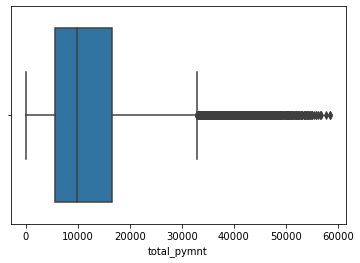

In [148]:

# Basic statistics with .describe() -Quantitative Variables
print("\n\n\nUnivariate Analysis oftotal_pymnt")
loan.total_pymnt.describe()
sns.boxplot(loan.total_pymnt)

Before Removal of Outliers :

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

After Removal of Outliers :

count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

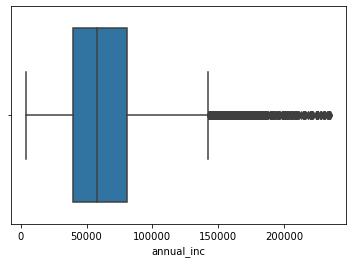

In [149]:
# Basic statistics with .describe() -Quantitative Variables

print('Before Removal of Outliers :\n')
print(loan['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]

print('\nAfter Removal of Outliers :\n')
print(loan["annual_inc"].describe())

# Now below data looks much better. Lets plot later and find some conclusions

sns.boxplot(loan.annual_inc)

<AxesSubplot:xlabel='int_rate'>

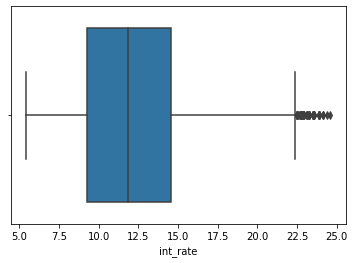

In [150]:
# Basic statistics with .describe() -Quantitative Variables

loan['int_rate'].describe()

# Average intrest rate is 12 %
# after 75% percentile interest rate zoom'ed to 25% from 15%.

sns.boxplot(loan.int_rate)

Correlation matrix-closness among numerical variables



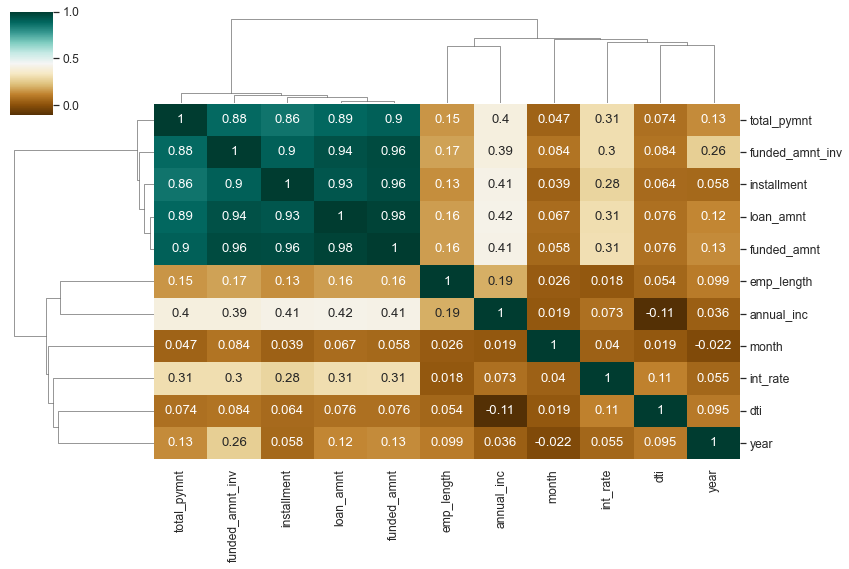

In [151]:
 #Correlation Matrix-Quantitative Variables
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.
print("Correlation matrix-closness among numerical variables\n")
loan_correlation = loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

# Observation is that Loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
# That means when annual income is low DTI is high & vice versa.
# positive correlation between annual income and employment years.
# That means income increases with work experience ;)

In [152]:
# Data cleaning
# Drop additional columns which are not needed further in analysis.
columns_drop_list4 = ["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
loan.drop(labels = columns_drop_list4, axis =1, inplace=True,errors='ignore')
print('After dropping more columns now data shape:',loan.shape)
print("check if any column has null:\n",loan.isnull().sum())

After dropping more columns now data shape: (39319, 42)
check if any column has null:
 id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    49
total_acc                      0
out_prncp                      0
out_prncp_inv         

In [153]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

# Lets take a look on shape and data
print("After created new columns ",loan.shape)
loan.head(1)

# Observation is we have created extra 5 columns after dropping many.

After created new columns  (39319, 46)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
0,1077501,5000,5000,4975.00,36 months,10.65,B,B2,10,RENT,...,171.62,May-16,0,0,2011,12,0-7000,20000-40000,10-13,NaN


Distribution of three loan amount fields using distribution plot 



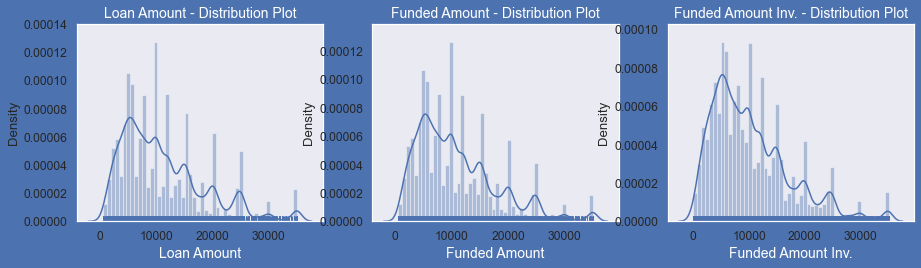

In [154]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables
print("Distribution of three loan amount fields using distribution plot \n")
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.
# We will work with only loan amount column for rest of our analysis.



Now we will see only Loan amount graph 



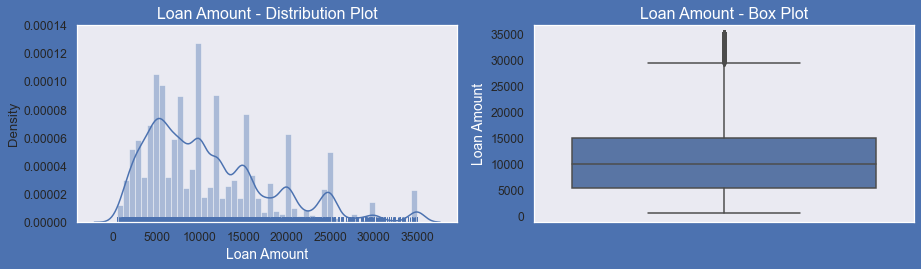

In [155]:
# Univariate Analysis on Loan amount-Quantitative Variables
print("Now we will see only Loan amount graph \n")

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()
# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

Intrest Rate Analysis



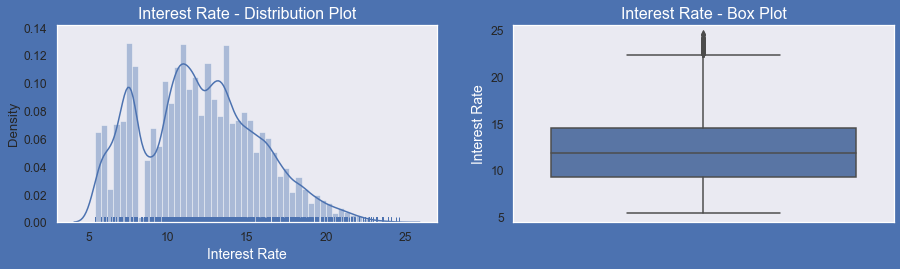

In [156]:
# Univariate Analysis on Intrest Rate-Quantitative Variables
print("Intrest Rate Analysis\n")
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%


Annual Income Analysis



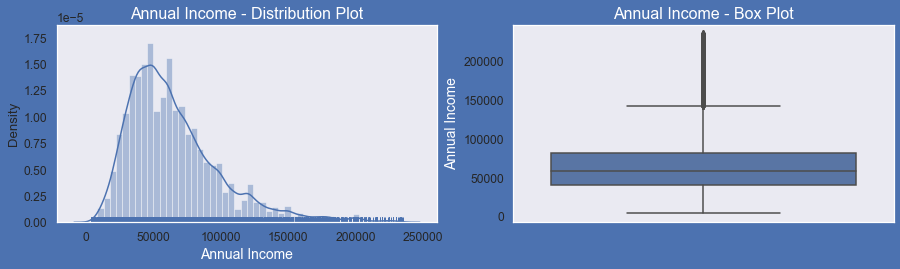

In [157]:
# Univariate Analysis on Annual Income - Quantitative Variables
print("Annual Income Analysis\n")
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000


Loan Status



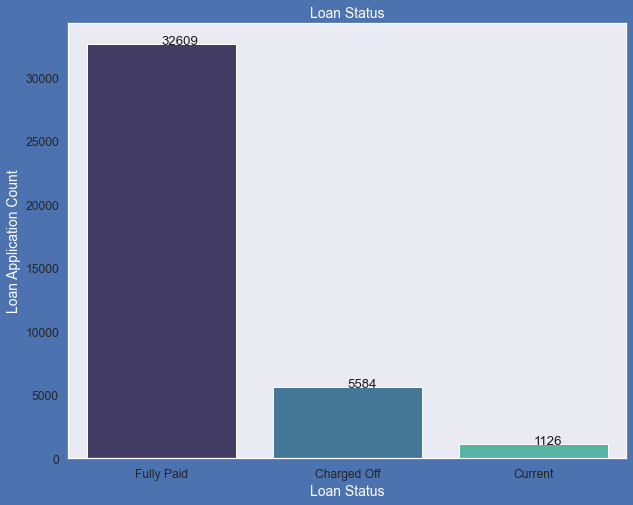

In [158]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status
print("Loan Status\n")
plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=loan['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

Purpose of Loan



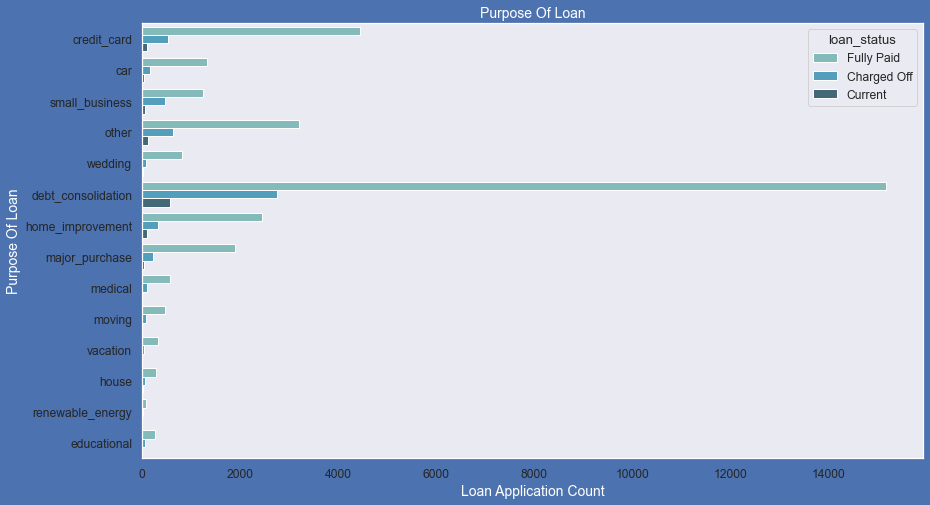

In [159]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan
print("Purpose of Loan\n")
plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

Home Ownership



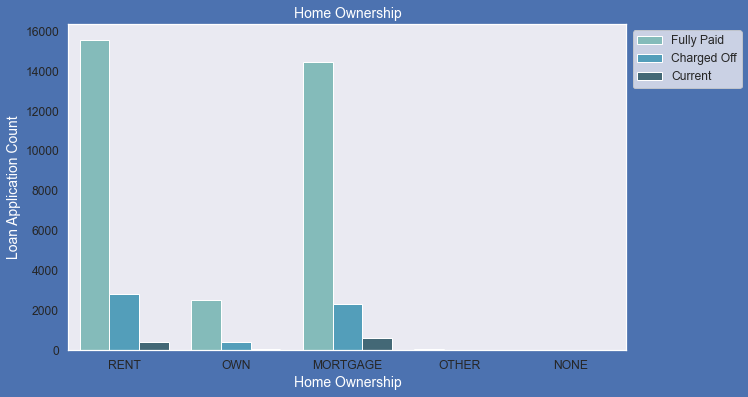

In [160]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership
print("Home Ownership\n")
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()
# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

Ordered categorical variable


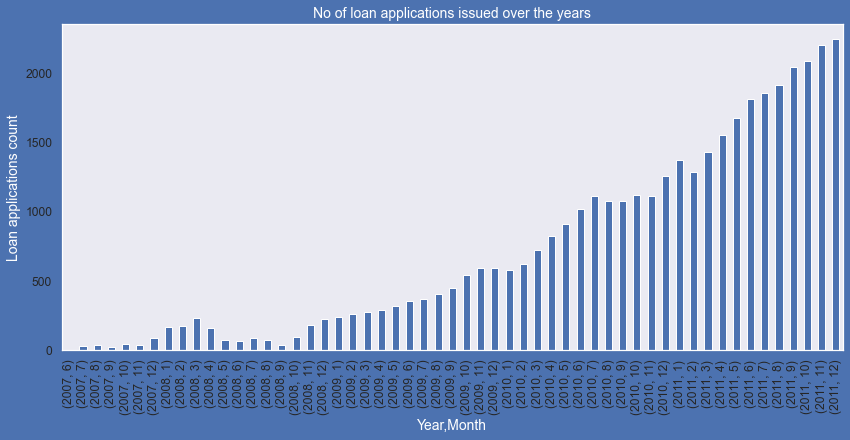

In [161]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
print("Ordered categorical variable")
plt.figure(figsize=(14,6),facecolor='b')
loan.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()

# Observation is that count of loan application is increasing every passing year.
# so increase in number of loan applications are adding more to number of charged off applications.
# number of loans issued in 2008( May-October) got dipped, may be due to Recession.

Ordered categorical variable


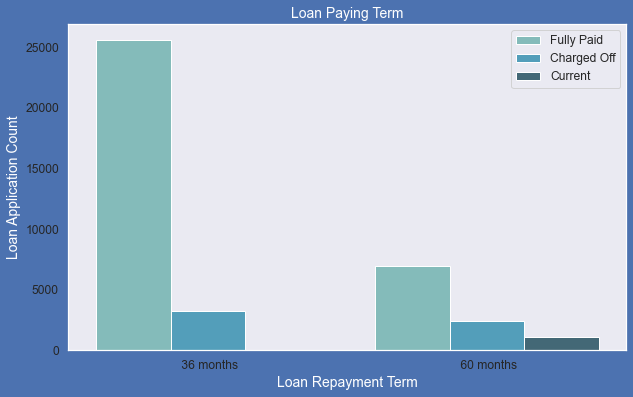

In [162]:

# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term
print("Ordered categorical variable")
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.


In [163]:
#Bivariate Analysis : Part 1
#Bivariate Analysis : 
# In this part of analysis, lets try to analyze the loan status against some important columns which might have played 
# important role in charged off of loans. Lets try to find proportion of charged offs in some categories. 
# To calculate the proportion of charged off loans, will do these below steps: 
# Group loans by different variables and loan status, get the count,use .unstack() to return a DataFrame.
# Since we’re going to use this for further analysis, it will be helpful to use .reset_index() to clean up the index. 
# Assign the new DataFrame to a variable. 
# Create a simple derived column that sums charged off,current and fully paid loans for each category. 
# Divide the number of charged off loans by the total number of loans to get the proportion of charged off loans.
# Store this as another derived column. # Finally, output the whole table, sorted by proportion of charged off in each category
#issued loans.

# Bivariate Analysis on annual income against Chargedoff_Proportion 
print("Income aginst Chargedoff_Propotion\n")

inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 



Income aginst Chargedoff_Propotion



loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.20
1,20000-40000,1514,170,7004,8688,0.17
2,40000-60000,1729,345,9534,11608,0.15
3,60000-80000,1024,240,6597,7861,0.13
4,80000 +,1080,362,8531,9973,0.11


Annual income VS Charged Off Propotion



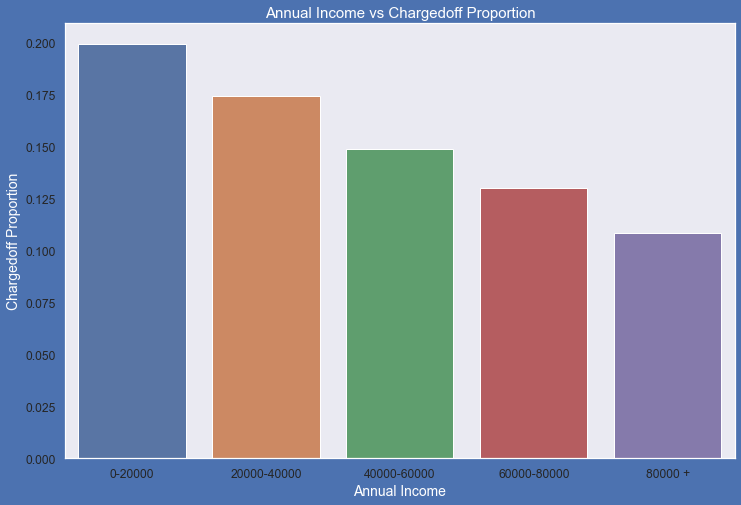

In [164]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
print ("Annual income VS Charged Off Propotion\n")
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

In [165]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.
print("Purpose of loan against Chargedoff_Proportion\n")
purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

Purpose of loan against Chargedoff_Proportion



loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,472.00,74.00,1251.00,1797.00,0.26
10,renewable_energy,19.00,1.00,81.00,101.00,0.19
3,educational,55.00,0.00,268.00,323.00,0.17
9,other,629.00,126.00,3203.00,3958.00,0.16
8,moving,91.00,7.00,479.00,577.00,0.16
5,house,58.00,14.00,299.00,371.00,0.16
7,medical,106.00,12.00,568.00,686.00,0.15
2,debt_consolidation,2752.00,580.00,15165.00,18497.00,0.15
12,vacation,53.00,6.00,322.00,381.00,0.14
4,home_improvement,338.00,97.00,2459.00,2894.00,0.12


Purpose of loan VS chargedoff Propotion



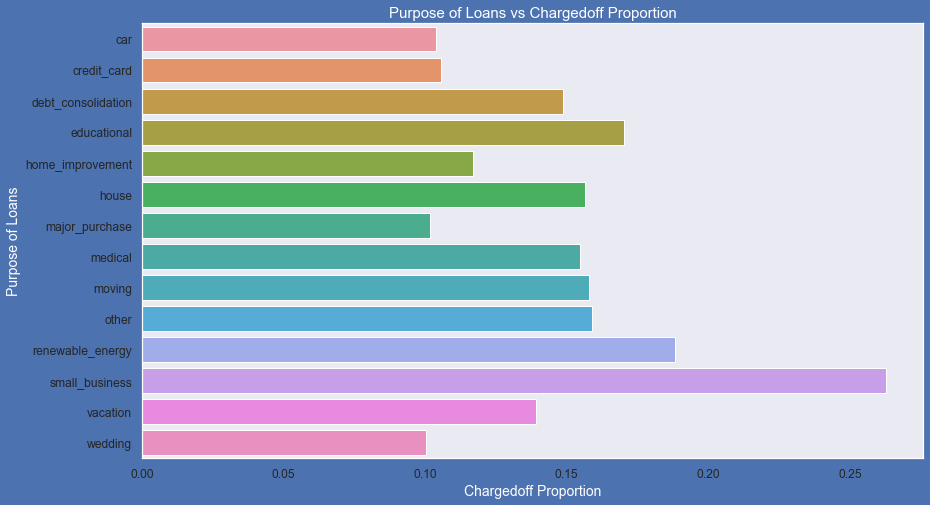

In [166]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.
print("Purpose of loan VS chargedoff Propotion\n")
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

In [167]:
# Bivariate Analysis on grade against Chargedoff_Proportion
print("Grade vs Chargedoff proportion\n")
grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

Grade vs Chargedoff proportion



loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,99,17,190,306,0.32
5,F,312,71,642,1025,0.30
4,E,704,176,1906,2786,0.25
3,D,1112,216,3916,5244,0.21
2,C,1342,262,6411,8015,0.17
1,B,1414,344,10167,11925,0.12
0,A,601,40,9377,10018,0.06


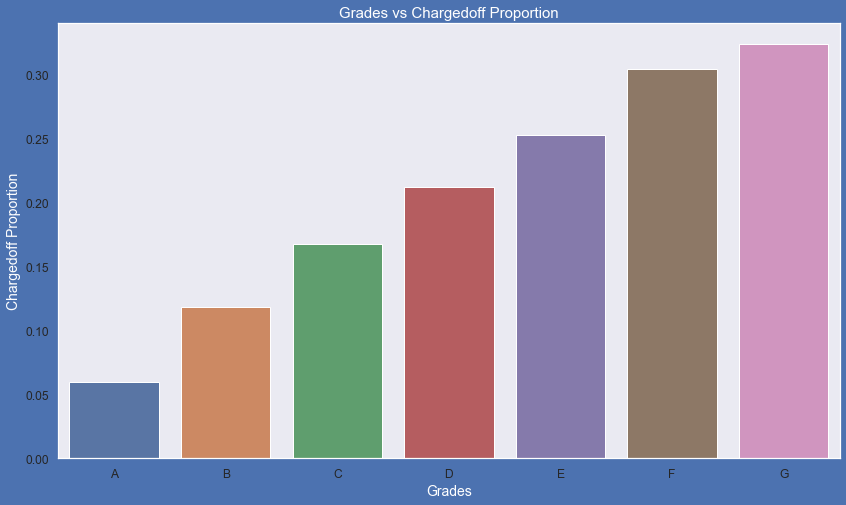

In [168]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

In [169]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_Proportion

grade_vs_loan = loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"


loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,53.00,4.00,55.00,112.00,0.47
32,G3,19.00,3.00,25.00,47.00,0.40
31,G2,27.00,1.00,47.00,75.00,0.36
34,G5,10.00,1.00,18.00,29.00,0.34
28,F4,52.00,17.00,96.00,165.00,0.32
30,G1,31.00,10.00,61.00,102.00,0.30
23,E4,126.00,28.00,293.00,447.00,0.28
26,F2,69.00,16.00,162.00,247.00,0.28
27,F3,50.00,11.00,118.00,179.00,0.28
25,F1,88.00,23.00,211.00,322.00,0.27


Sub grades vs charged off propotion



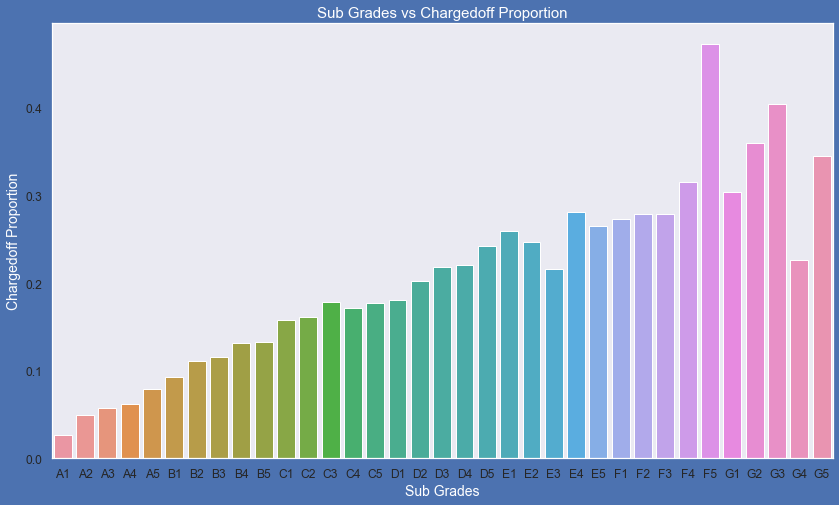

In [170]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
print("Sub grades vs charged off propotion\n")
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()
# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [171]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = loan.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.


loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1250,351,3317,4918,0.25
2,12.5-16,1995,329,9354,11678,0.17
1,10-13,1224,269,8083,9576,0.13
0,0-10,825,77,11403,12305,0.07


Interest Rate vs Chargedoff Proportion



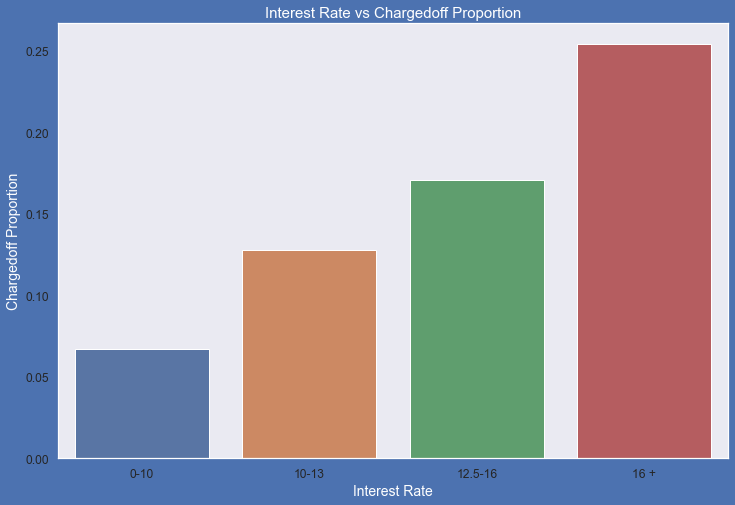

In [172]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.
print("Interest Rate vs Chargedoff Proportion\n")
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

In [173]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.


loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0,227,42,801,1070,0.21
10,10,1316,386,7038,8740,0.15
7,7,262,62,1435,1759,0.15
1,1,1090,143,6533,7766,0.14
5,5,456,87,2712,3255,0.14
8,8,203,43,1216,1462,0.14
6,6,305,58,1846,2209,0.14
3,3,551,82,3426,4059,0.14
4,4,456,94,2860,3410,0.13
2,2,561,97,3684,4342,0.13


EmpoymnetLength VS Chargedoff Proportion



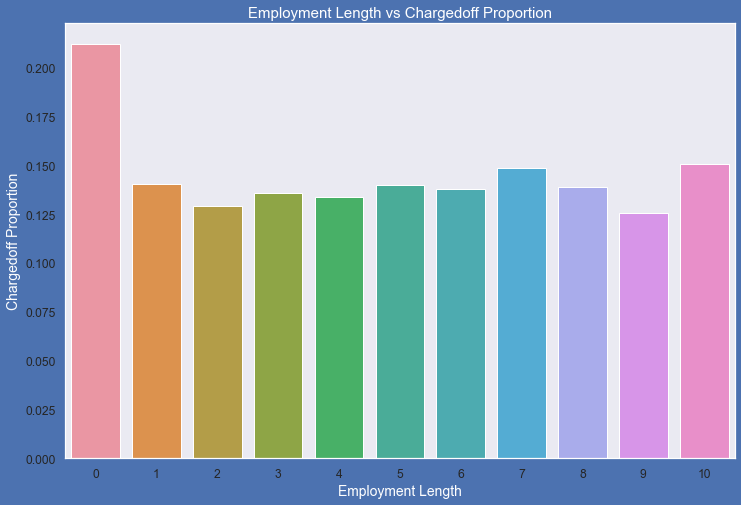

In [174]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
print("EmpoymnetLength VS Chargedoff Proportion\n")
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.


In [175]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.00,0.00,2.00,5.00,0.60
32,NV,107.00,17.00,368.00,492.00,0.22
40,SD,12.00,2.00,50.00,64.00,0.19
0,AK,14.00,2.00,63.00,79.00,0.18
9,FL,497.00,85.00,2252.00,2834.00,0.18
24,MO,114.00,16.00,551.00,681.00,0.17
13,ID,1.00,0.00,5.00,6.00,0.17
31,NM,30.00,5.00,149.00,184.00,0.16
11,HI,28.00,8.00,138.00,174.00,0.16
4,CA,1116.00,149.00,5767.00,7032.00,0.16


Address State vs Chargedoff Proportion



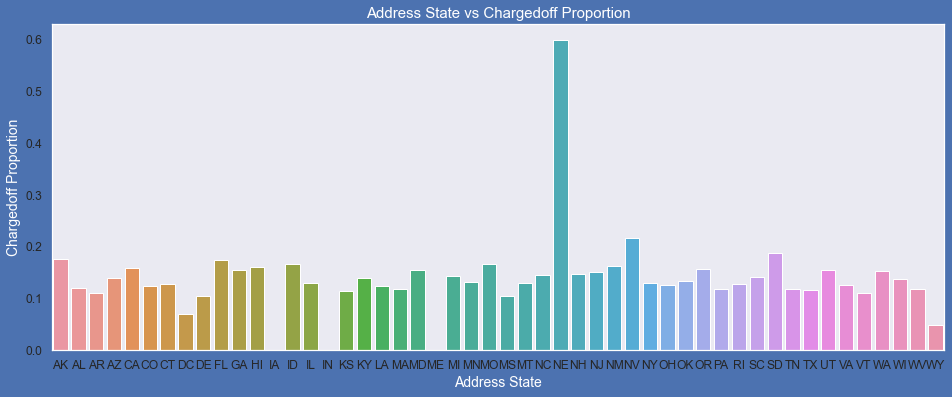

In [176]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
print("Address State vs Chargedoff Proportion\n")
fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='b')
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

In [177]:

# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Current'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2032,593,10000,12625,0.16
1,Source Verified,1422,306,8135,9863,0.14
0,Not Verified,2130,227,14474,16831,0.13


Verification Status vs Chargedoff Proportion



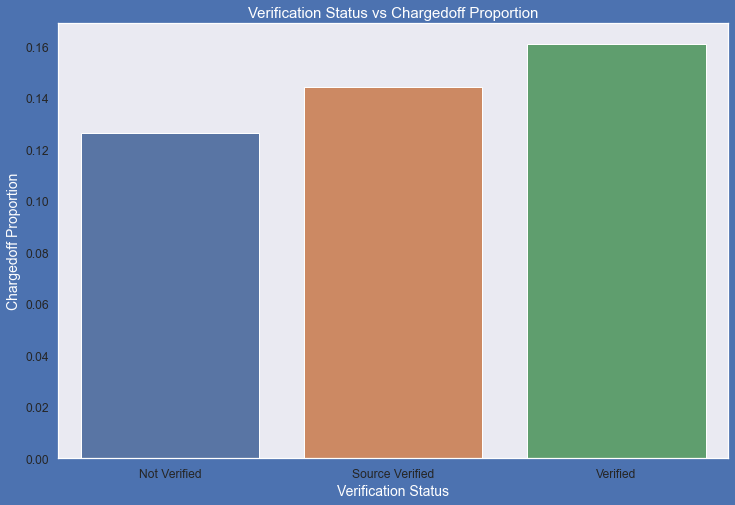

In [178]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
print("Verification Status vs Chargedoff Proportion\n")
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

In [179]:

# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,2,2.00,2.00,3.00,7.00,0.29
1,1,365.00,37.00,1268.00,1670.00,0.22
3,Not Known,116.00,0.00,572.00,688.00,0.17
0,0,5101.00,1087.00,30766.00,36954.00,0.14


Public Bankruptcy Records vs Chargedoff Proportion



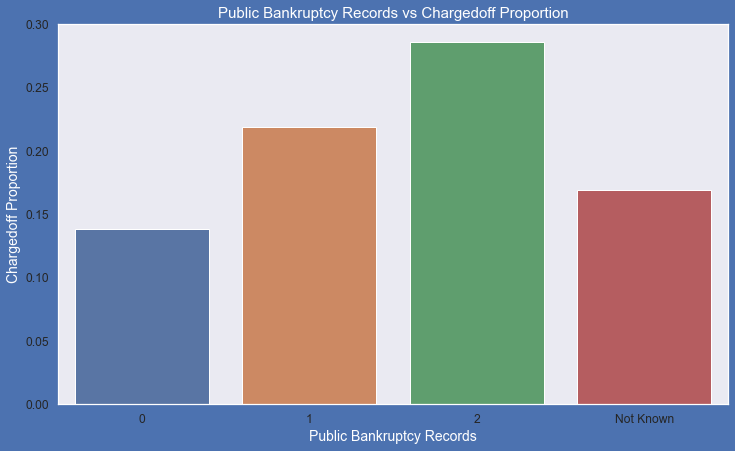

In [180]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
print("Public Bankruptcy Records vs Chargedoff Proportion\n")
fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

In [181]:

# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan = loan.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,1,454.00,43.00,1551.00,2048.00,0.22
2,2,10.00,3.00,37.00,50.00,0.20
0,0,5120.00,1080.00,31012.00,37212.00,0.14
3,3,0.00,0.00,7.00,7.00,0.00
4,4,0.00,0.00,2.00,2.00,0.00


Derogatory Public Record vs Chargedoff Proportion



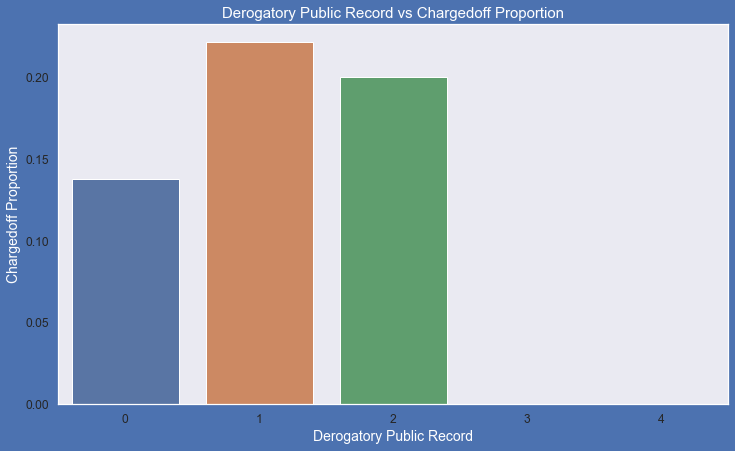

In [182]:

# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
print("Derogatory Public Record vs Chargedoff Proportion\n")
fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

 Puprose of loan vs Loan amount



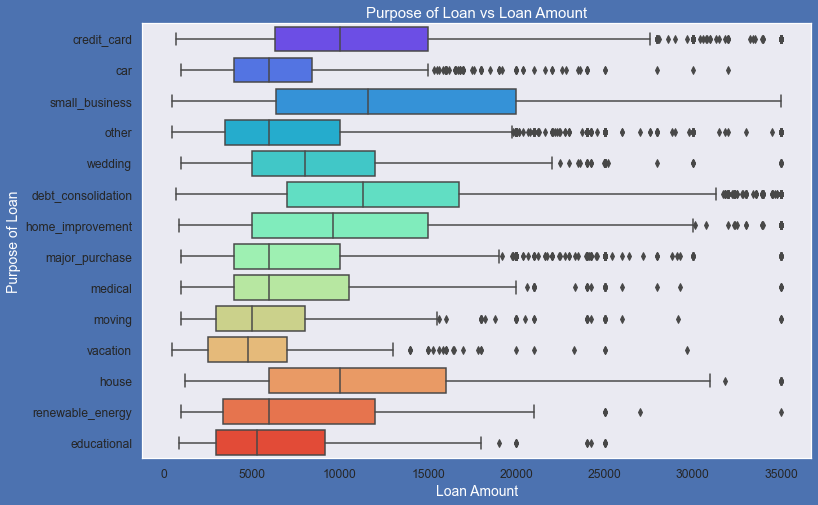

In [183]:
# Bivariate Analysis - Part 2
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot
print(" Puprose of loan vs Loan amount\n")
plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.


Puprose of loan vs Loan amount



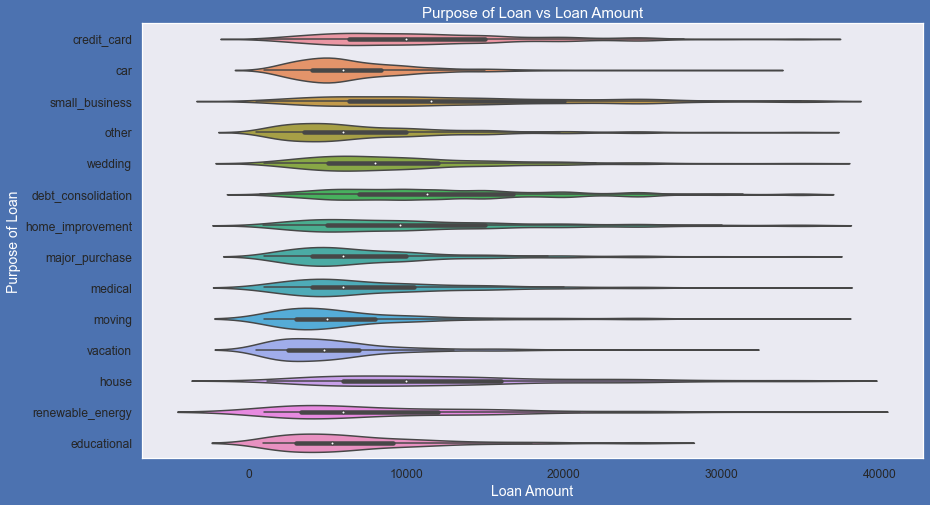

In [184]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# violin Plot - It shows the distribution of quantitative data across several levels of one (or more) categorical variables 
# such that those distributions can be compared. 
print("Puprose of loan vs Loan amount\n")
plt.figure(figsize=(14,8),facecolor='b')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =loan)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed
# as compare to loan taken for other purposes.

Term of loan vs Interest Rate



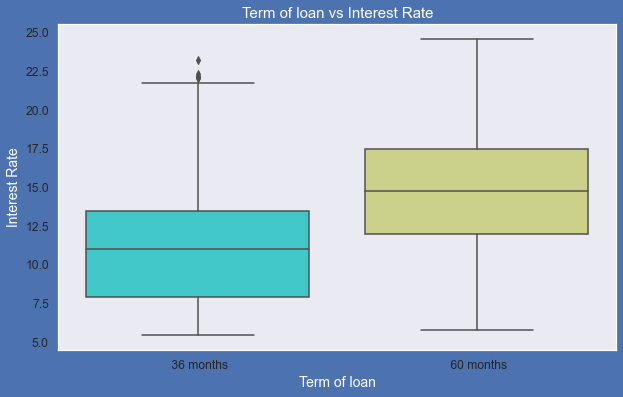

In [185]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot
print("Term of loan vs Interest Rate\n")
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =loan,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.


Purpose vs Interest Rate



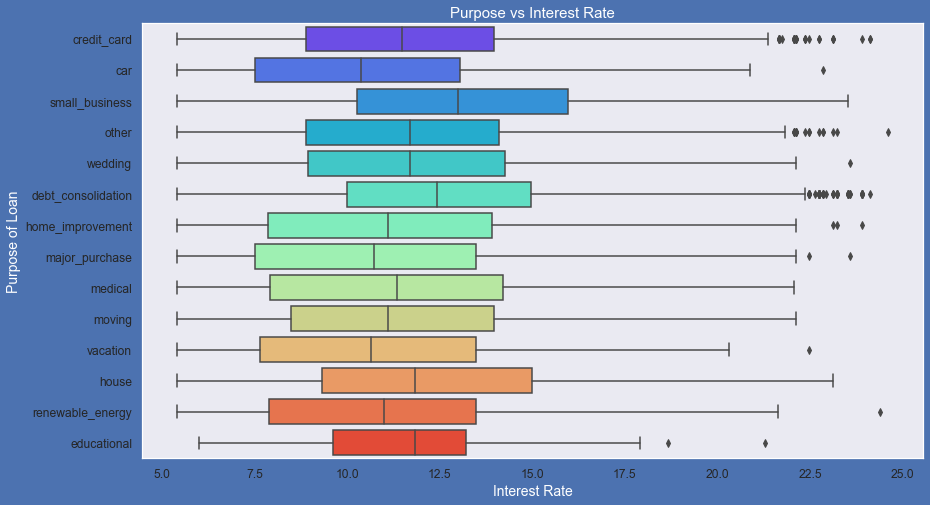

In [186]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot
print("Purpose vs Interest Rate\n")
plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.

Grade vs Interest Rate



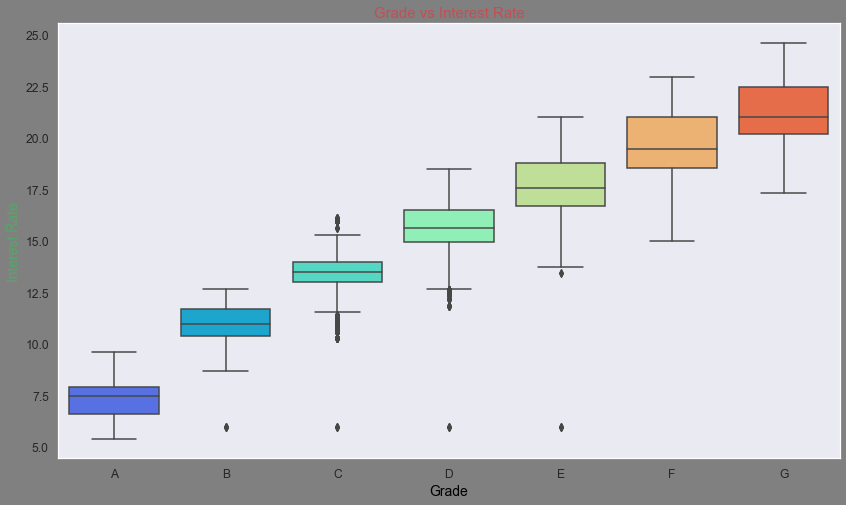

In [187]:

# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

print("Grade vs Interest Rate\n")
plt.figure(figsize=(14,8),facecolor='grey')
ax = sns.boxplot(y='int_rate', x='grade', data =loan,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='r')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'g')
ax.set_xlabel('Grade',fontsize=14,color = 'black')
plt.show()

# Observations:
# A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
# It is clear that intrest rate is increasing with grades moving from A to F.


Loan Amount vs Interest Rate



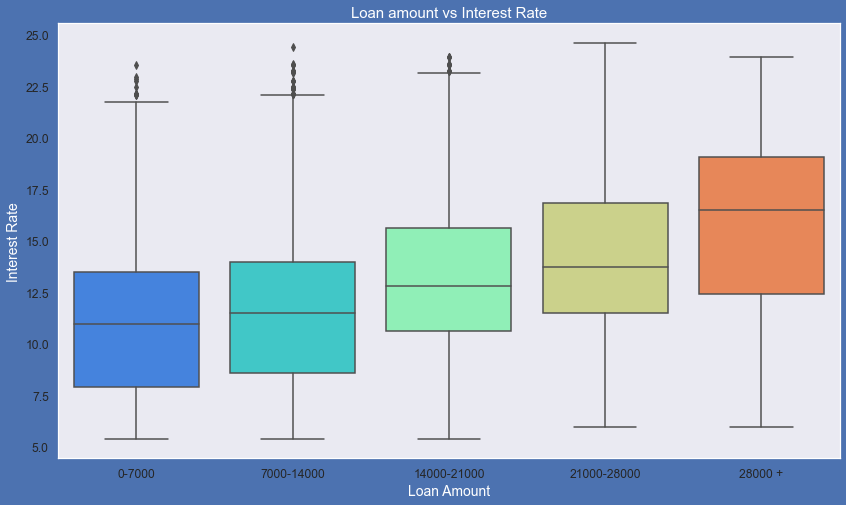

In [188]:

# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot
print("Loan Amount vs Interest Rate\n")
plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the
# interest rate.

dti vs Interest Rate



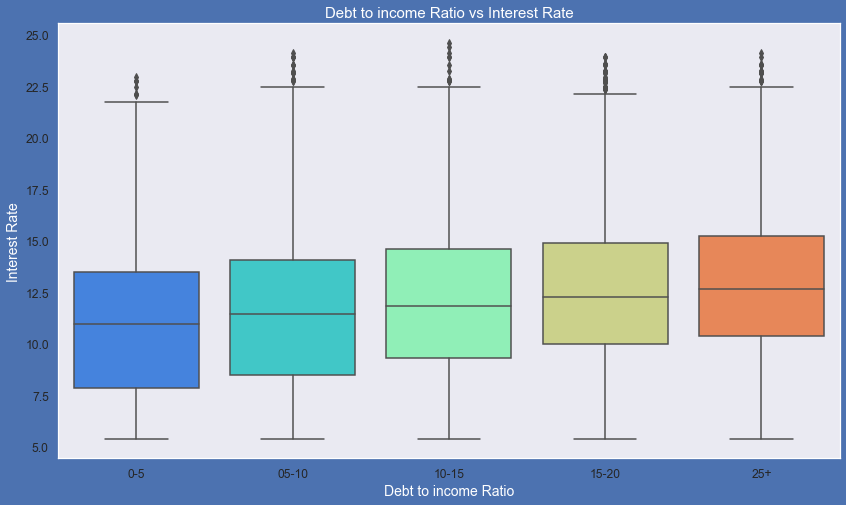

In [189]:
# Bivariate Analysis - It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the
# interest rate.
# Box Plot
print("dti vs Interest Rate\n")
plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =loan,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

# Observations:
# If your DTI is low enough you may get a lower interest rate.
# Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

 Recoveries vs Annual income



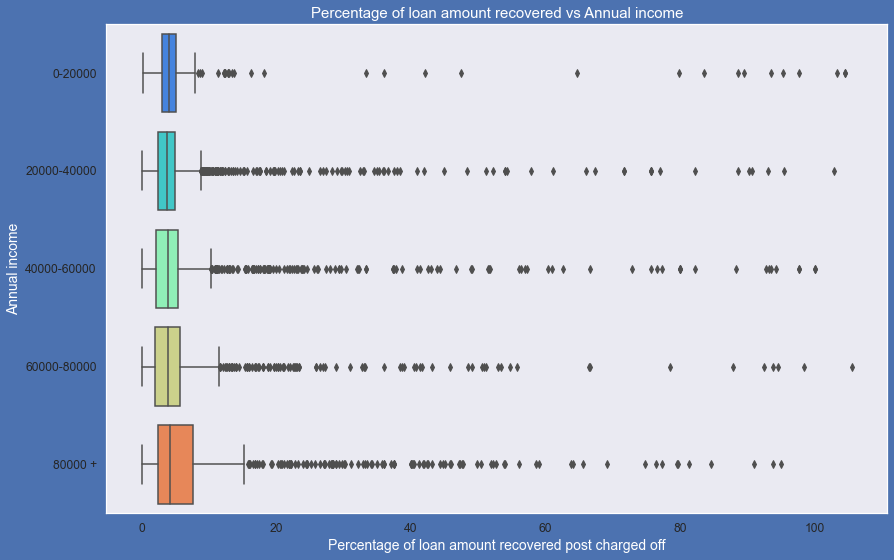

In [190]:

# Bivariate Analysis - Recoveries vs Annual income
# Box Plot
print(" Recoveries vs Annual income\n")
loan['recoveries']=pd.to_numeric(loan['recoveries'],errors='coerce')
loan_df_rec=loan[loan['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9),facecolor='b')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'w')
plt.show()

# Observations:
# Higher percentage of loan amount is recovered when annual income is high.
# Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.


Variation of annual income across grade for every loan status



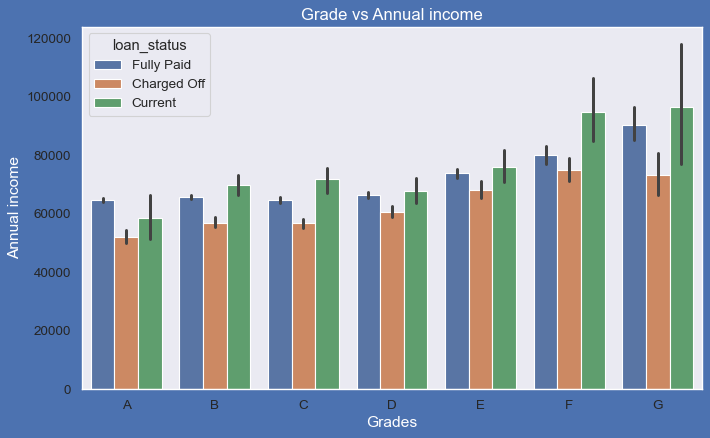

In [191]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.
print("Variation of annual income across grade for every loan status\n")
plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
# who'paid fully' for each and every grade (i.e. at same interest range)

 Analysis - year vs Interest Rate



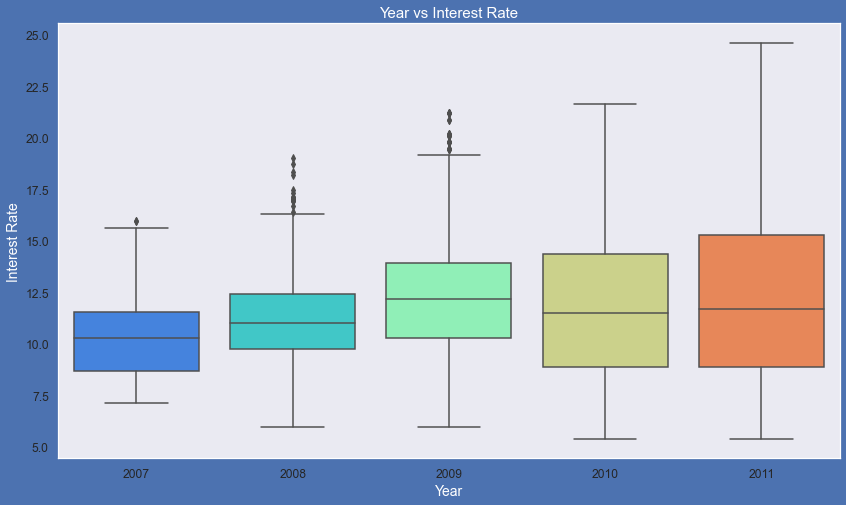

In [192]:

# Bivariate Analysis - year vs Interest Rate
# Box Plot
print(" Analysis - year vs Interest Rate\n")
plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =loan,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

# Observations:
# Plot shows intrest rate is increasing slowly with increase in year.

In [197]:
# Multivariate Analysis - Pair Plots
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.
print(" Lets draw a pair plot for multivariate analysis\n")
loan_pair = loan[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()
print(loan_pair.head())

# Take the log of below variables as they are heavily skewed
#loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
#loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
#loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])



 Lets draw a pair plot for multivariate analysis

   loan_amnt  annual_inc  year  int_rate  loan_status
0       5000    24000.00  2011     10.65   Fully Paid
1       2500    30000.00  2011     15.27  Charged Off
2       2400    12252.00  2011     15.96   Fully Paid
3      10000    49200.00  2011     13.49   Fully Paid
4       3000    80000.00  2011     12.69      Current


loan Status



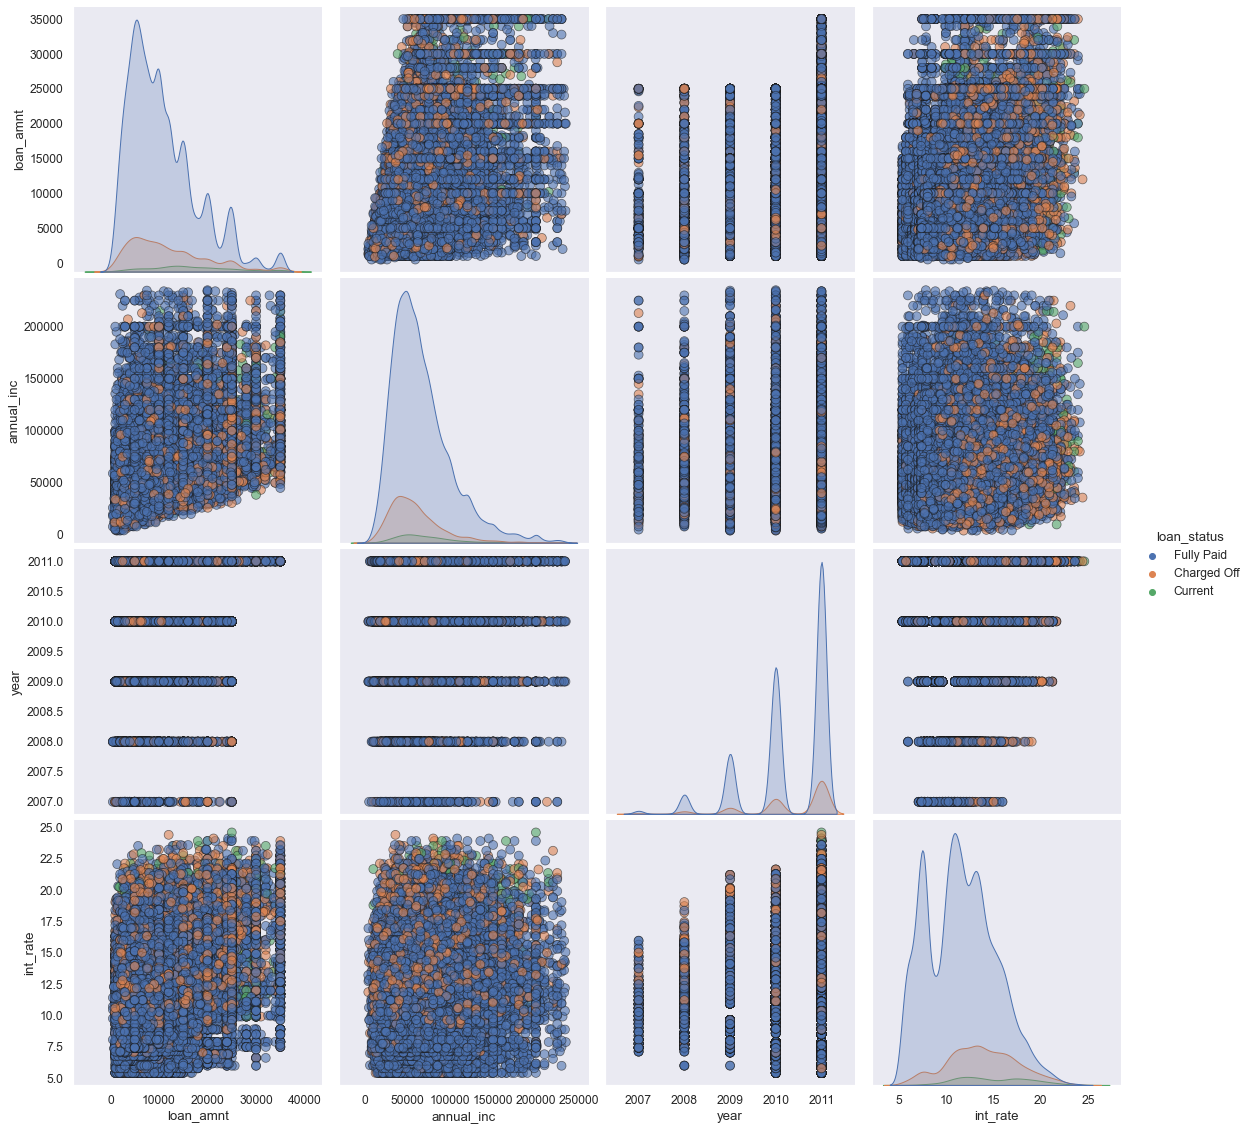

In [194]:
# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
print("loan Status\n")
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()
# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly.
# increase in number of charged off with increase in year.
# intrest rate is increasing with loan amount increase

pick year 2010 for getting some insights



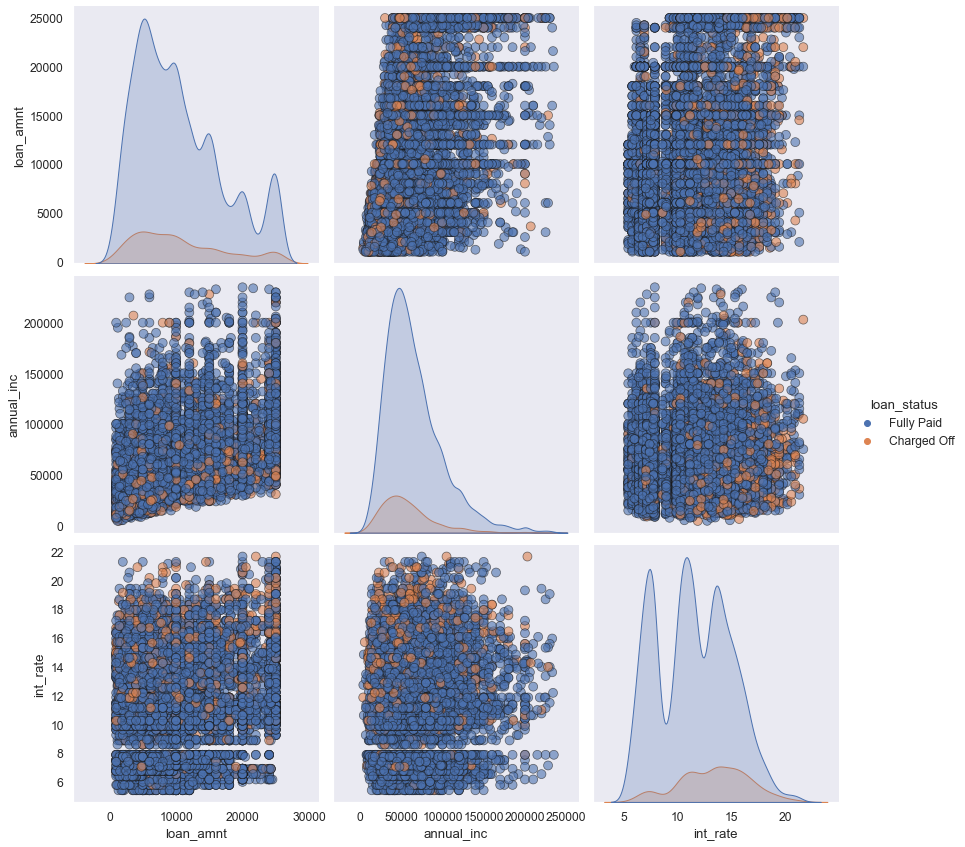

In [196]:

# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.
# Above plot is too dense so just pick year 2010 for getting some insights.
print("pick year 2010 for getting some insights\n")
sns.pairplot(loan_pair[loan_pair['year'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly
# Intrest rate is increasing with loan amount increase this results in high charged off.
